In [1]:
import random
random.seed(123)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
import scipy.stats as stats

In [5]:
sns.set_style("whitegrid")
#sns.set_palette('Set1')

In [7]:
input_data = "36.FromJsontoRawstream_ANEWeaarthquake2_japan_Pre_CNNv2_Accumulate10secondsPredZERO_Ori.csv"
df = pd.read_csv("../resources/data/earthquake/Earthquake5/" + input_data,header=None,names=['col0','col1','col2'],sep=",")

In [8]:
df.drop('col0', axis=1, inplace=True)
df.drop('col1', axis=1, inplace=True)

In [9]:
#Show for viewing
df.head(10)

col2
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0

In [10]:
#Kich thuoc du lieu
print df.shape

(20140, 1)


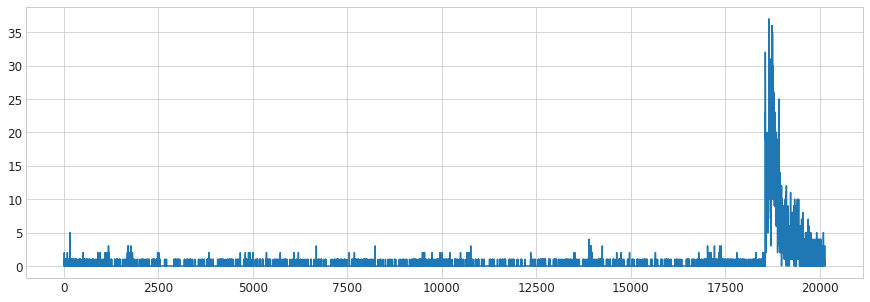

In [12]:
fig = plt.figure(figsize=(15,5))
df['col2'].plot()
plt.show()

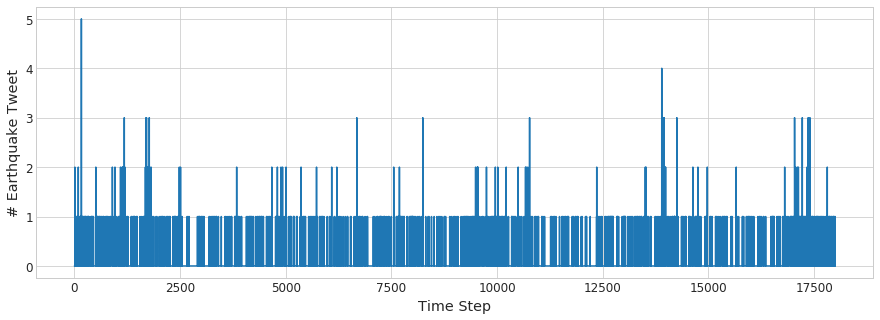

In [13]:
#tin hieu o trang thai khong co dong dat Without earthquake event situation
fig = plt.figure(figsize=(15,5))
df0 = df['col2'][0:18000]
plt.plot(df0)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("No earthquake")
pp.savefig(fig)
pp.close()

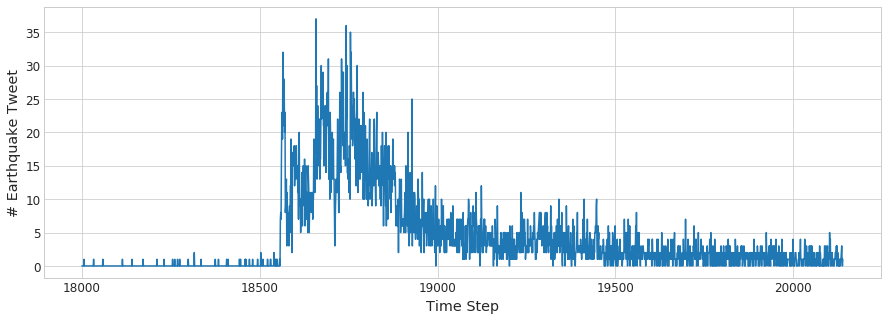

In [14]:
#isolate earthquake event [anomaly1]
fig1 = plt.figure(figsize=(15,5))
df1= df['col2'][18000:]
plt.plot(df1)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig1)
pp.close()

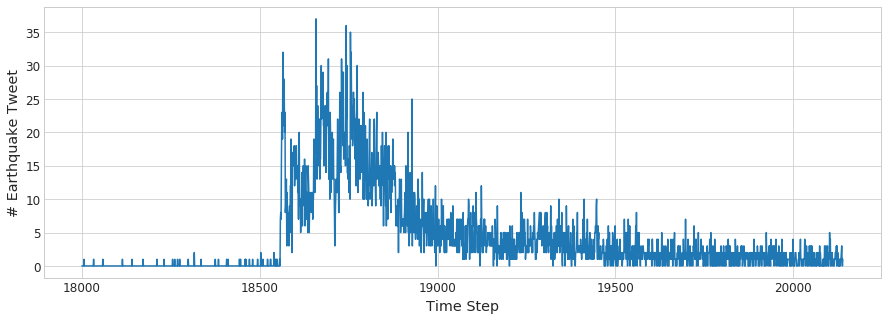

In [15]:
#isolate anomaly 2
fig2 = plt.figure(figsize=(15,5))
df2= df['col2'][18000:]
plt.plot(df2)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig2)
pp.close()

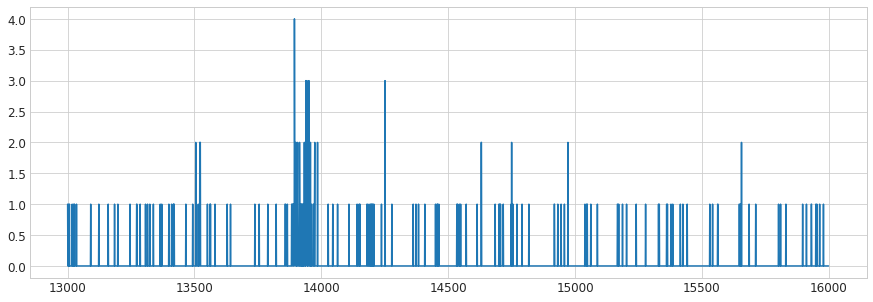

In [18]:
#isolate end sequence
fig3 = plt.figure(figsize=(15,5))
df3= df['col2'][13000:16000]
plt.plot(df3)
plt.show()

In [19]:
df['anomaly'] = 0
df.head(28750)

col2  anomaly
0         0        0
1         0        0
2         0        0
3         0        0
4         0        0
5         0        0
6         0        0
7         0        0
8         0        0
9         0        0
10        0        0
11        0        0
12        2        0
13        0        0
14        0        0
15        0        0
16        0        0
17        0        0
18        0        0
19        0        0
20        0        0
21        1        0
22        0        0
23        0        0
24        0        0
25        0        0
26        0        0
27        0        0
28        0        0
29        0        0
...     ...      ...
20110     1        0
20111     0        0
20112     0        0
20113     1        0
20114     1        0
20115     0        0
20116     1        0
20117     1        0
20118     2        0
20119     2        0
20120     1        0
20121     3        0
20122     0        0
20123     3        0
20124     1        0
20125     2        0
20126     0        0
20127     1        0
20128     0        0
20129     1        0
20130     0        0
20131     1        0
20132     0        0
20133     1        0
20134     1        0
20135     2        0
20136     3        0
20137     1        0
20138     0        0
20139     1        0

[20140 rows x 2 columns]

Size of test: 20140
Size of validation1: 2140
Size of validation2: 20140
Size of train: 18000
Total: 60420
Ratio of test: 0.333333
Ratio of validation1: 0.035419
Ratio of validation2: 0.333333
Ratio of train: 0.297915


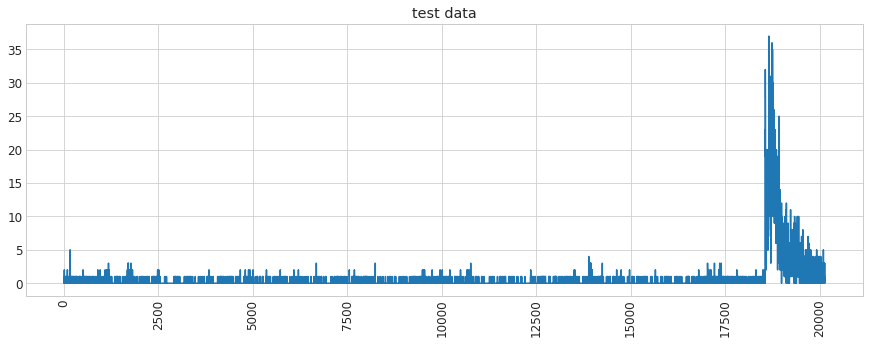

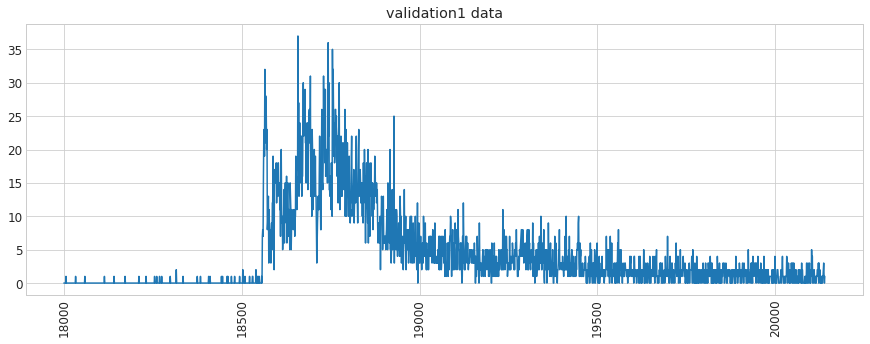

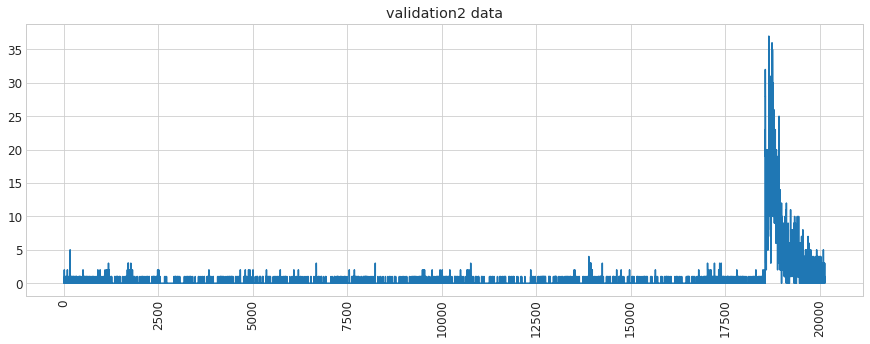

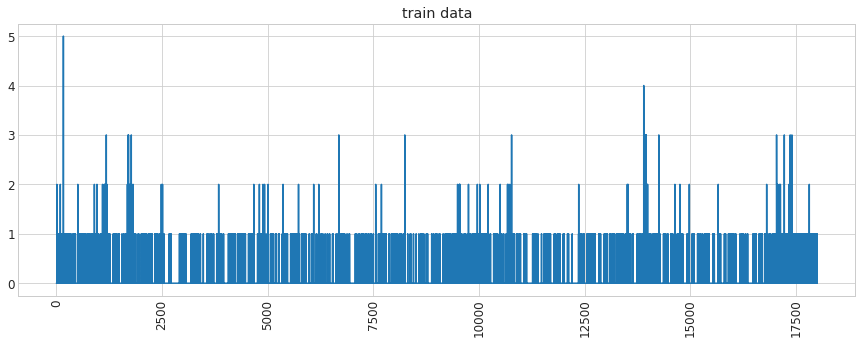

In [20]:
df_anomaly1 = df[18000:]
df_test = df

df_validation1= df[18000:]

df_not_train = df_anomaly1
df_train = df[~df.isin(df_not_train)].dropna()
df_validation2 = df_test

df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

    
for key in df_dict:
    df_tmp = df_dict[key]
    plt.figure()
    df_tmp['col2'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        print row
        plt.plot(row[0], row[1], 'r.', markersize=10.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [22]:
for key in df_dict:
    np.save("../resources/data/earthquake/Earthquake5/%s"%(key),df_dict[key])

In [23]:
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here

In [24]:
data_folder = "../resources/data/earthquake/Earthquake5/"

In [25]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape

(17998, 1)
(17998,)


In [26]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)

(20138, 1)
(20138,)
(20138, 1, 1)
(20138, 1)


In [27]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(20138, 1)
(20138,)
(20138, 1)


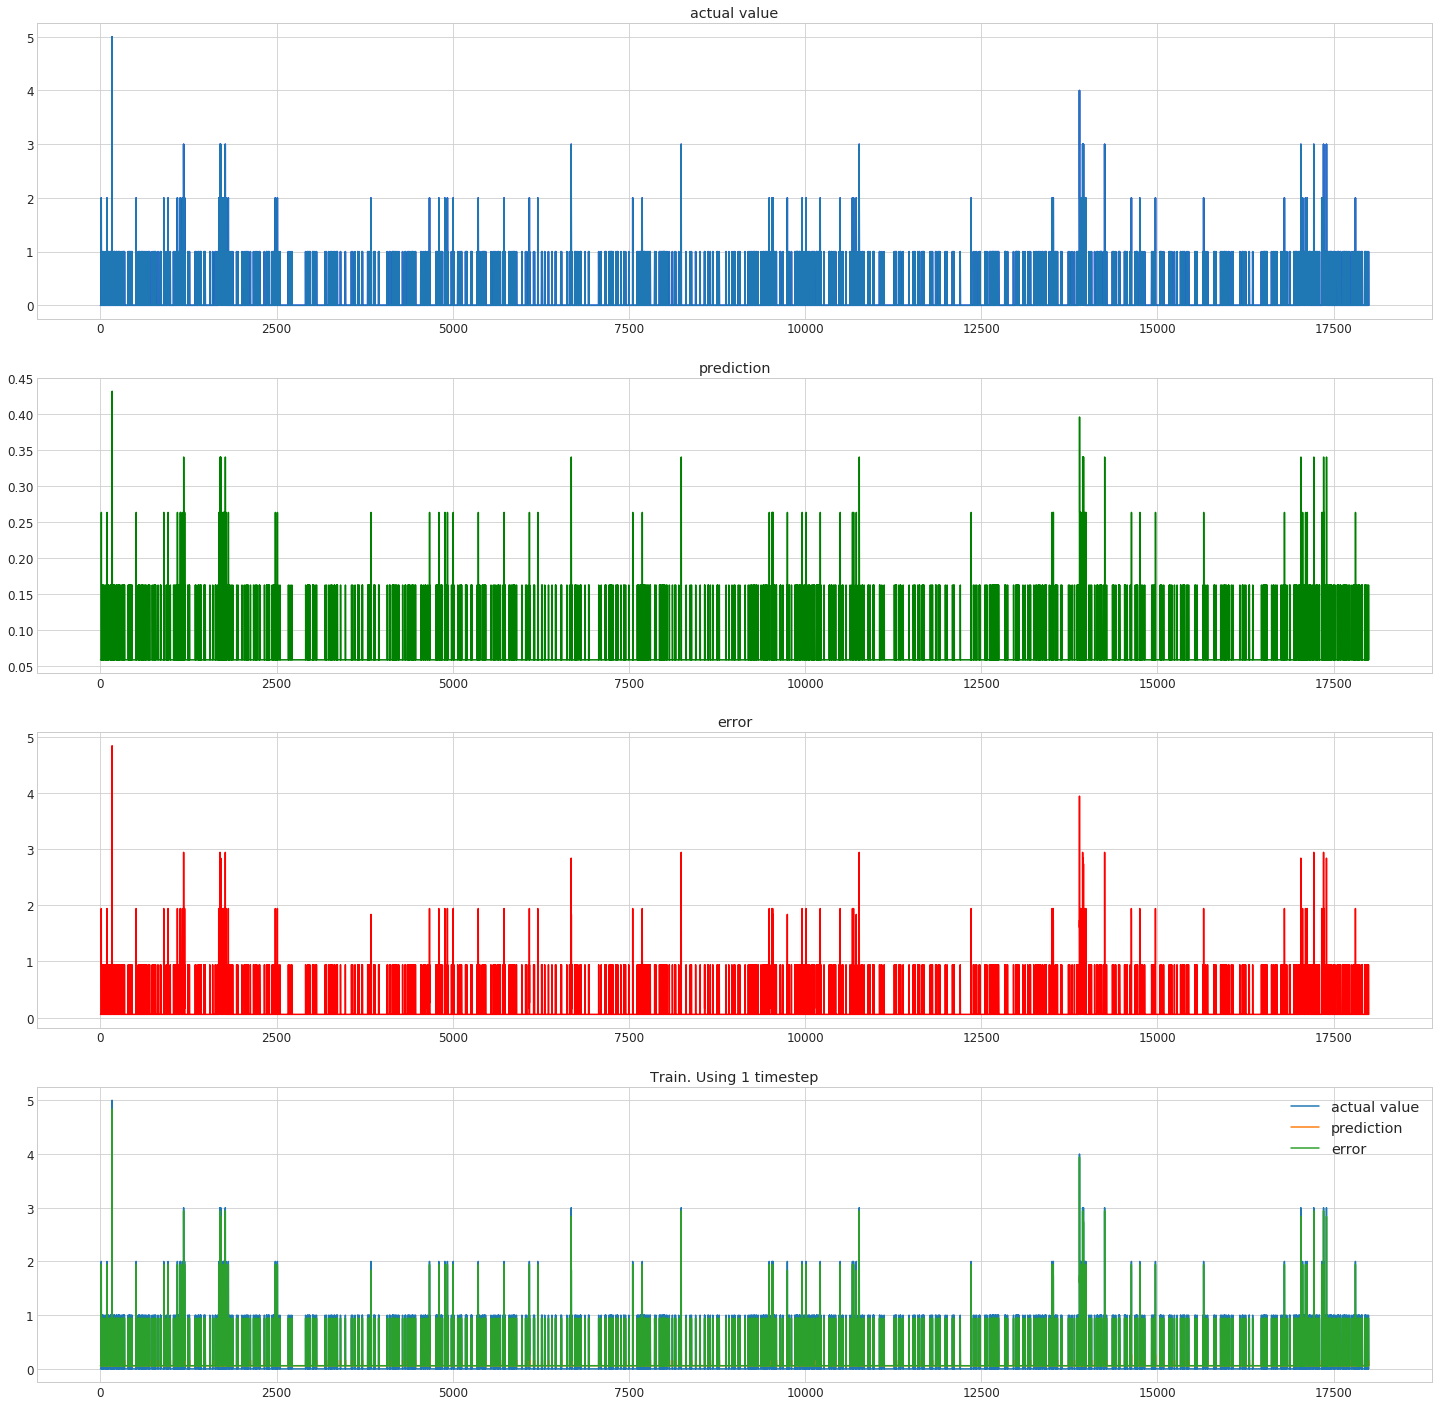

In [28]:
plt.figure(figsize=(25,25))
plt.subplot(411)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(412)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(413)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(414)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.show()

0.12173586605518893
0.2484154544455795


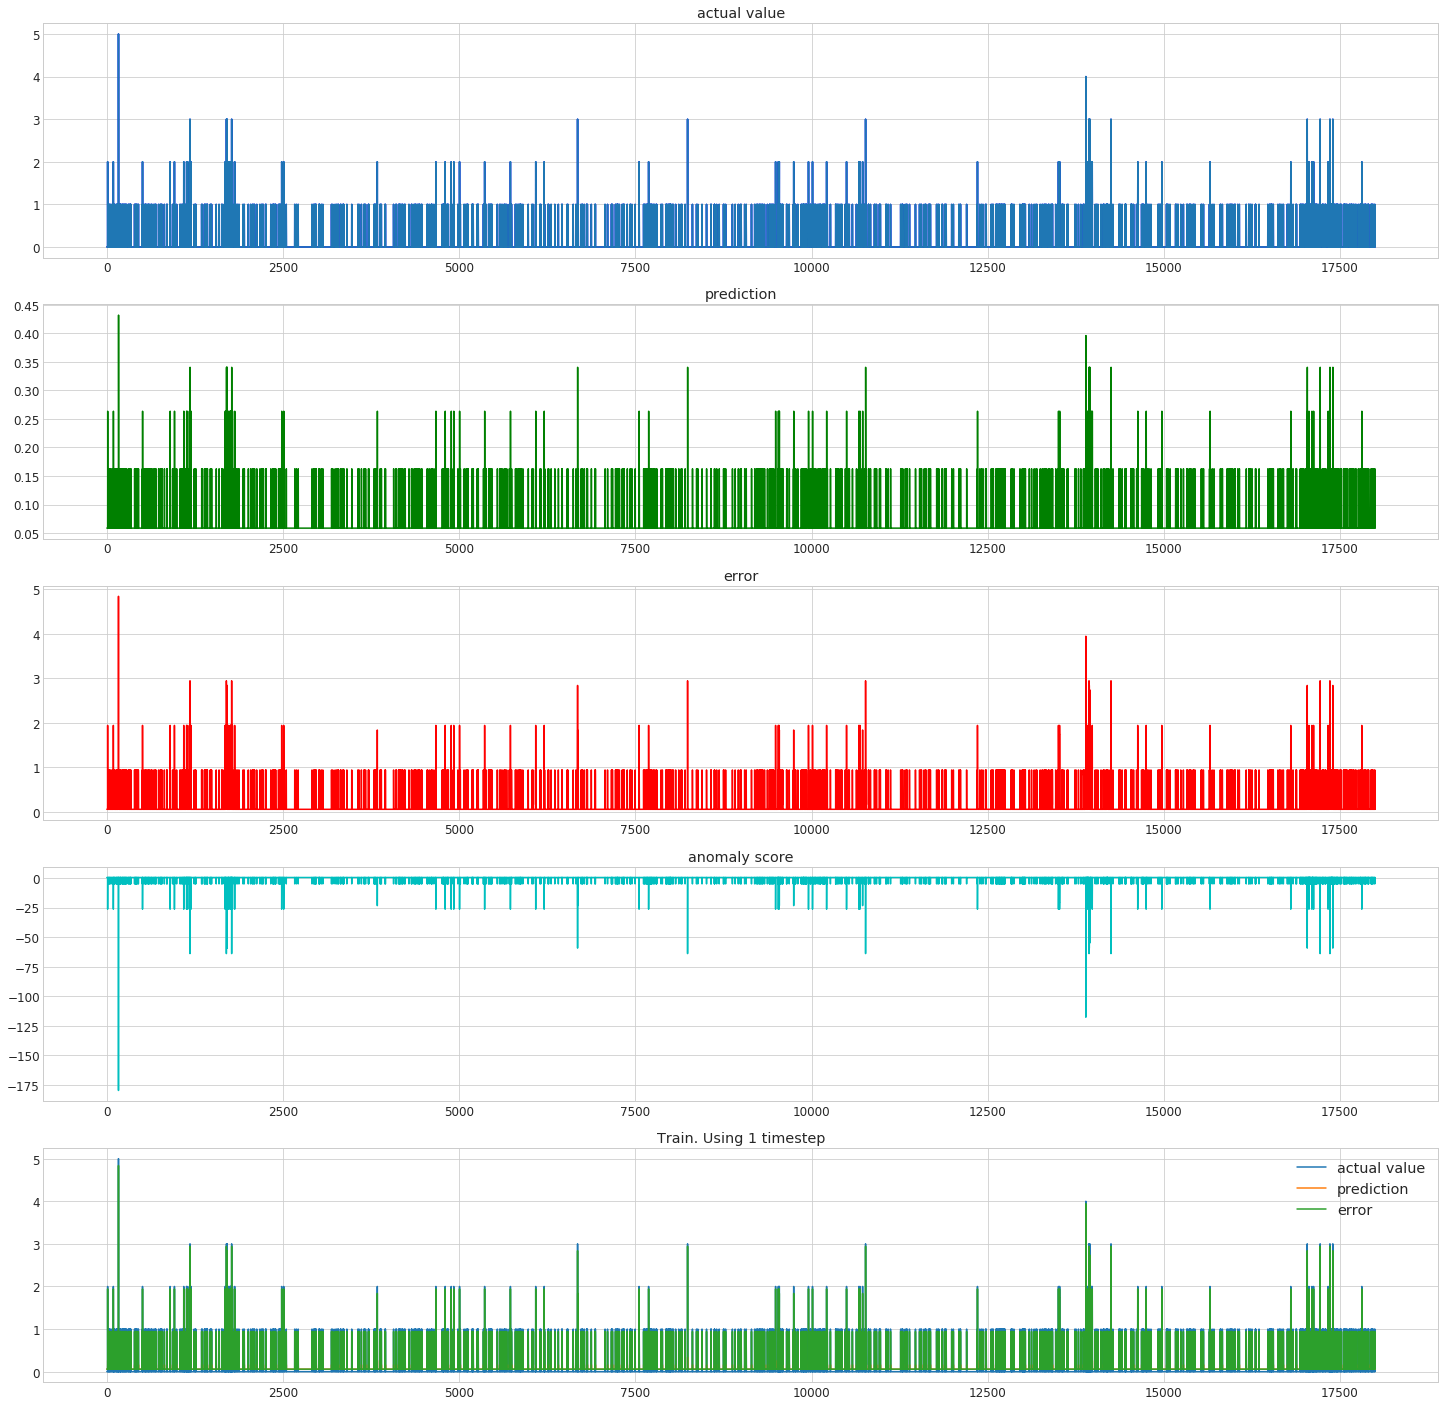

In [29]:
#error vectors
from scipy.stats import norm

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  np.abs(train_true -train_predictions[:,i])

#ERROR DIMENSION
error_dimension = 1
train_error_vectors = train_error_vectors[:,0:error_dimension]
mean = np.mean(train_error_vectors)
std = np.std(train_error_vectors)
print mean
print std
p_values= norm(loc=mean, scale=std).logpdf(train_error_vectors)

plt.figure(figsize=(25,25))
plt.subplot(511)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(512)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(513)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(515)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.subplot(514)
plt.plot(p_values,'c-')
plt.title("anomaly score")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [30]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  np.abs(validation2_true -validation2_predictions[:,i])

v2_error_vectors = v2_error_vectors[:,0:error_dimension]
v2_p_values= norm(loc=mean, scale=std).logpdf(v2_error_vectors)

print v2_p_values.shape
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_error_vectors = test_error_vectors[:,0:error_dimension]
test_p_values= norm(loc=mean, scale=std).logpdf(test_error_vectors)
test_true_anomalies = np.where(test_labels[:,0]==1)

(20138, 1)


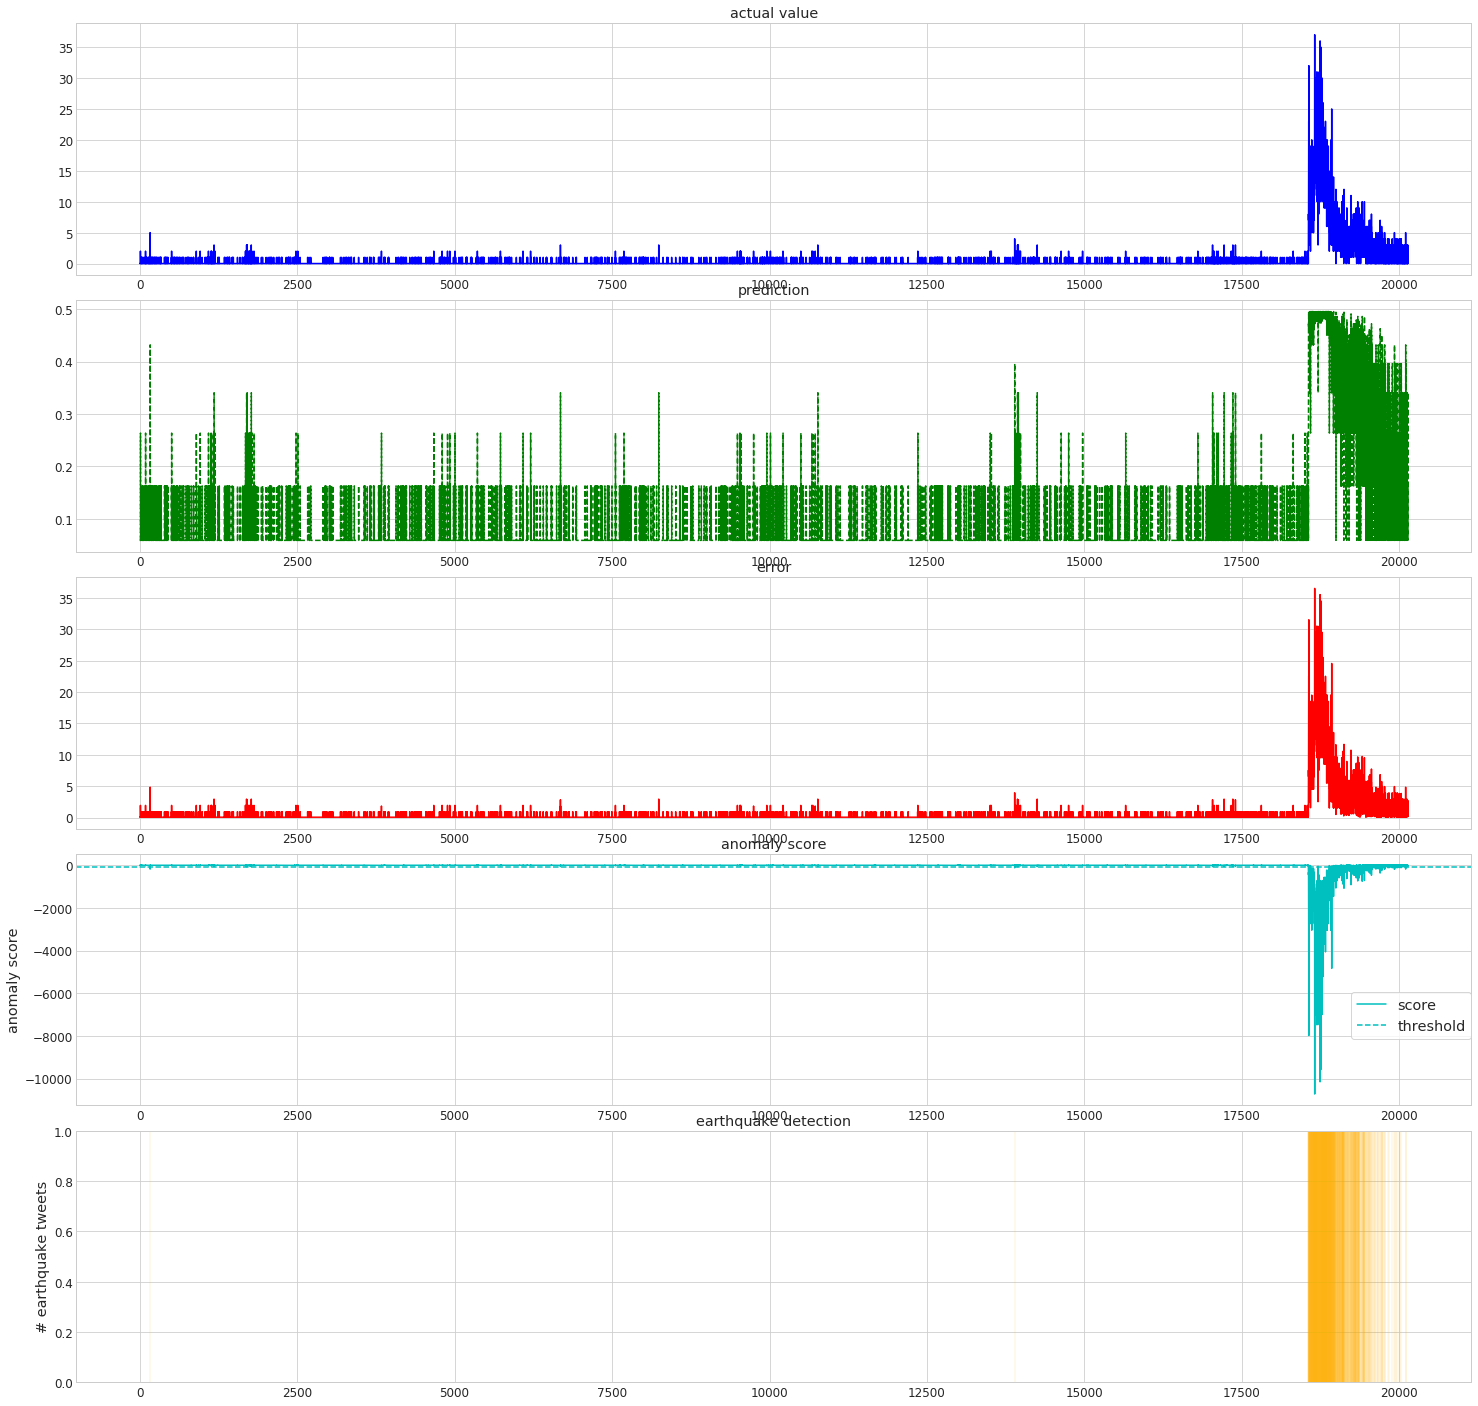

In [31]:
threshold_v2 = -100

f = plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)

#print v2_below_threshold

ax1 = plt.subplot(511)
ax1.plot(validation2_true,label='actual value',color='b')
plt.title("actual value")

ax2 = plt.subplot(512,sharex=ax1)
ax2.plot(validation2_predictions[:,0],ls ='dashed',label='prediction',color='g')
plt.title("prediction")

ax3 = plt.subplot(513, sharex=ax1)
ax3.plot(abs(validation2_true - validation2_predictions[:,0]),label='error',color='r')
plt.title("error")

ax5 = plt.subplot(515, sharex=ax1)
for column in v2_below_threshold[0]:
    ax5.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=.1)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)

plt.ylabel("# earthquake tweets")
plt.title("earthquake detection")


#plot v2 log PD
ax4 = plt.subplot(514, sharex=ax1)
ax4.plot(v2_p_values,label='score',color='c')
ax4.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax4.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
plt.title("anomaly score")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
# xticklabels = ax1.get_xticklabels()
# plt.setp(xticklabels, visible=False)
# plt.xlabel("time")
plt.show()
pp = PdfPages('earthquake5 tweets_v2.pdf')
pp.savefig(f)
pp.close()

[  165 13893 18557 18558 18559 18560 18561 18562 18563 18564 18565 18566
 18567 18568 18569 18570 18571 18572 18573 18574 18576 18577 18578 18579
 18580 18582 18583 18584 18585 18586 18587 18588 18589 18591 18592 18593
 18594 18595 18596 18597 18598 18599 18600 18601 18602 18603 18604 18605
 18606 18607 18608 18609 18610 18611 18612 18613 18614 18615 18616 18617
 18618 18619 18620 18621 18622 18623 18624 18625 18626 18627 18628 18629
 18630 18631 18632 18633 18634 18635 18636 18637 18638 18639 18640 18641
 18642 18643 18644 18645 18646 18647 18648 18649 18650 18651 18652 18653
 18654 18655 18656 18657]


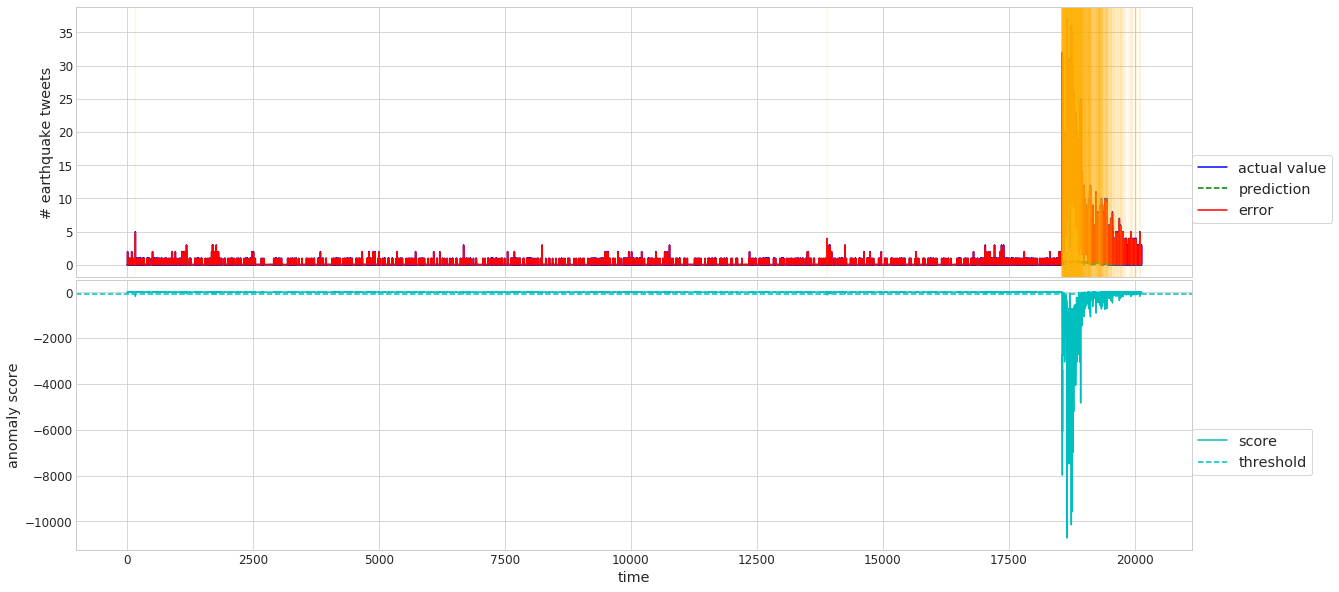

In [32]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
print test_below_threshold[0][0:100]
#plot test data
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='actual value',color='b')
ax1.plot(test_predictions[:,0],ls ='dashed',label='prediction',color='g')
ax1.plot(abs(test_true - test_predictions[:,0]),label='error',color='r')
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("# earthquake tweets")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='score',color='c')
ax2.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("time")
plt.show()
pp = PdfPages('Earthquake_test.pdf')
pp.savefig(f)
pp.close()

In [36]:
df = pd.read_csv("../resources/data/earthquake/Earthquake5/" + input_data,header=None,names=['col0','col1','col2'],sep=",")

In [37]:
df['col1'][18557]

'12/28/2016 12:39:09'

In [ ]:
# FINISH NOTEBOOK